# Exercising PBP HMB Generation on NRS11 data

The main steps in this notebook are:

- Determine input/output parameters for the exercise
- Do package module imports
- Create `HmbGen` object with the parameters 
- Generate HMB for a particular day (YYYYMMDD)
- Generate summary plot

## Inputs and output locations

*Note*: We indicate the particular day to process in a call later in the notebook.

In [1]:
# Inputs:

json_base_dir        = 'metadata/json'
global_attrs_uri     = 'metadata/attribute/globalAttributes_NRS11.yaml'
variable_attrs_uri   = 'metadata/attribute/variableAttributes_NRS11.yaml'
sensitivity_uri      = 'metadata/calibration/NRS11_H5R6_sensitivity_hms5kHz.nc'

voltage_multiplier   = 2.5
subset_to            = (10, 2_000)

# Output locations:

# Downloaded files are stored here while being processed:
download_dir         = 'downloads'

# Location for generated files:
output_dir           = 'output'

# A prefix for the name of generate files:
output_prefix        = 'NRS11_'

### Module imports

In [2]:
from pbp.simpleapi import HmbGen

# In this notebook we fetch audio files from public GCS buckets:
from google.cloud.storage import Client as GsClient

/opt/conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Create an `HmbGen` object with the parameters

In [3]:
hmb_gen = HmbGen()

hmb_gen.set_json_base_dir(json_base_dir)
hmb_gen.set_global_attrs_uri(global_attrs_uri)
hmb_gen.set_variable_attrs_uri(variable_attrs_uri)
hmb_gen.set_sensitivity(sensitivity_uri)
hmb_gen.set_voltage_multiplier(voltage_multiplier)
hmb_gen.set_subset_to(subset_to)
hmb_gen.set_gs_client(GsClient.create_anonymous_client())

hmb_gen.set_download_dir(download_dir)
hmb_gen.set_output_dir(output_dir)
hmb_gen.set_output_prefix(output_prefix)

## Check parameters

In [4]:
hmb_gen.check_parameters()
# If not errors exposed, we should be good to proceed.

## Select a day

In [5]:
# Our selected day in this demo (YYYYMMDD format):
date = '20201008' 

## Generate HMB product

In [6]:
result = hmb_gen.process_date(date)
# If all OK, the resulting NetCDF file should have been saved under the output directory.
# Here we expose the generated dataset itself to see it displayed in the notebook:
result.dataset

pbp v1.2.0: : Processing 20201008 to generate output/NRS11_20201008.nc...
::: Started processing date='20201008'
:::   Ended processing date='20201008' =>  nc_filename='output/NRS11_20201008.nc'


<xarray.Dataset>
Dimensions:      (time: 1440, frequency: 1088)
Coordinates:
  * time         (time) int64 1602115200 1602115260 ... 1602201480 1602201540
  * frequency    (frequency) float32 10.0 11.0 12.0 ... 1.993e+03 1.998e+03
Data variables:
    psd          (time, frequency) float32 92.69 92.8 90.79 ... 62.64 62.36
    effort       (time) float32 60.0 60.0 60.0 60.0 60.0 ... 60.0 60.0 60.0 60.0
    sensitivity  (frequency) float64 -153.6 -153.4 -153.2 ... -135.6 -135.9
Attributes: (12/28)
    title:                     Hybrid Millidecade Band Sound Pressure Levels ...
    Summary:                   To understand natural and anthropogenic sound ...
    Conventions:               COARDS, CF-1.6, ACDD-1.3
    keywords:                  oceans, ocean acoustics, ambient noise, intens...
    keywords_vocabulary:       GCMD Science Keywords
    history:                   Original hybrid millidecade spectra were produ...
    ...                        ...
    time_coverage_duration:    P1D
    time_coverage_resolution:  P60S
    platform:                  NOAA NRS11 mooring
    instrument:                AUH model ITC-1032, SN {{serial_number}}
    cdm_data_type:             TimeSeries
    references:                Computation of single-sided mean-square sound ...

## Generate summary plot

pbp v1.2.0: : Generating plot for 20201008 output/NRS11_20201008.jpg...


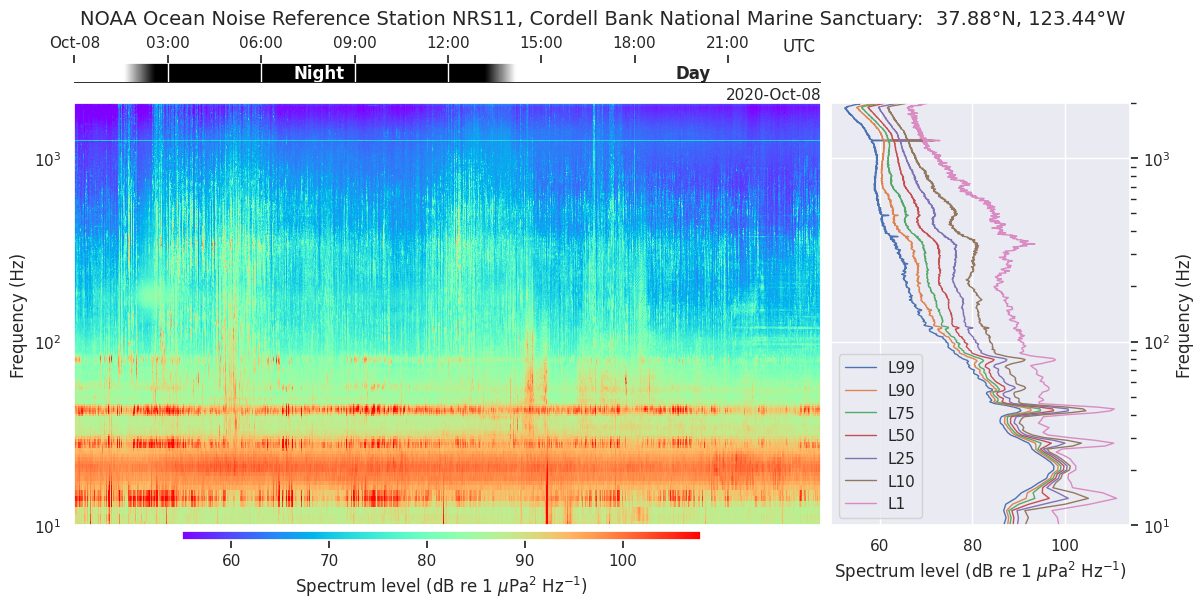

   done: output/NRS11_20201008.jpg


In [7]:
hmb_gen.plot_date(
    date,
    lat_lon_for_solpos=(37.88, -123.44),
    title='NOAA Ocean Noise Reference Station NRS11, Cordell Bank National Marine Sanctuary:  37.88°N, 123.44°W',
    ylim=(10, 2000),
    cmlim=(55, 108),
    dpi=300,
    show=True,    
)
# The JPEG file should have been saved (as a sibling of the NetCDF).
# The show=True above is to also display the plot here.